I train a Convolution Neural Network to map DNA sequence onto observed read depth. Let's look at the predictions that the model made on the training set: 

In [1]:
from train import unpickle 
training_data, validation_data, training_log = unpickle('../trained_model/training_data')
training_data.head()

,chromosome_number,end,observed_depth,sequence,start,predicted_depth
0,1,10500,294.79,CCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCC...,10200,126.398834
1,1,10800,77.06,TCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAA...,10500,25.787991
2,1,11100,27.35,CACATGCTAGCGCGTCGGGGTGGAGGCGTGGCGCAGGCGCAGAGAG...,10800,28.216904
3,1,11400,49.95,CTCACGTCACGGTGGCGCGGCGCAGAGACGGGTAGAACCTCAGTAA...,11100,34.590328
4,1,11700,82.31,GCACGCCCACCTGCTGGCAGCTGGGGACACTGCCGGGCCCTCTTGC...,11400,62.304897


In [2]:
validation_data.head()

,chromosome_number,end,observed_depth,sequence,start,predicted_depth
8,1,12900,87.58,GTCTCCCCCCAGGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGC...,12600,45.603508
14,1,14700,27.81,TGGTTTCTGCTCAGTTCTTTATTGATTGGTGTGCCGTTTTCTCTGG...,14400,45.997467
15,1,15000,83.48,ATTCCCAGTCGTCCTCGTCCTCCTCTGCCTGTGGCTGCTGCGGTGG...,14700,36.276196
17,1,15600,86.95,GGCAGCTTGCCTGGGGTCACAGAGCAAGGCAAAAGCAGCGCTGGGT...,15300,42.092773
23,1,17400,130.71,GGGGCAGCCAACAAGACCTTGTGTGCACCTCCCATGGGTGGAATAA...,17100,52.043816


In [3]:
training_log

,cost_test,cost_train,epoch
0,114.012810,115.540726,0
1,85.259995,86.696014,1
2,39.182316,40.479511,2
3,8.134041,9.329514,3
4,7.633166,8.807234,4
5,7.428388,8.582255,5
6,7.221351,8.349903,6
7,7.043515,8.149486,7
8,6.894428,7.973757,8
9,6.768302,7.820386,9


Optional: Visualize the `tensorflow` computation graph and training metrics by executing the following command and then [clicking here](http://localhost:6006). 

In [4]:
%%capture 
!tensorboard --logdir='../trained_model/tensorboard'

Compare the corrected depth profile (observed depth divided by predicted depth) with the normalized depth profile (observed depth divided by their mean): 

number of examples: 64567


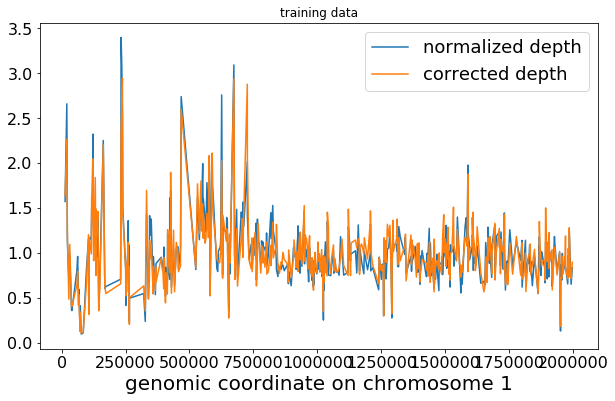

In [5]:
%matplotlib inline 
from plot import plot_corrected_depths
plot_corrected_depths(training_data, title='training data')

number of examples: 64567


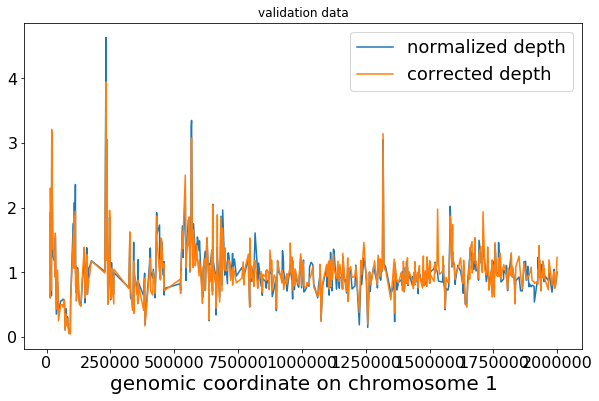

In [6]:
plot_corrected_depths(validation_data, title='validation data')

I used the trained model to make predictions on an independent test set containing a chromosomal deletion: 

In [7]:
from test import unpickle 
test_data = unpickle('../trained_model/test_data')
test_data.head()

,chromosome_number,end,observed_depth,sequence,start,predicted_depth
0,1,189654300,51.12,TCTTATTAGCAAGAAAAAAAAAATACCAGCAAAAGGTTGTAAAACA...,189654000,48.388237
1,1,189654600,50.34,TGCCTAGAATCTGATCTGTTCAGAAAGCAGACAGCAGTTGTTAGAT...,189654300,55.559875
2,1,189654900,47.85,ATTGGAGCTGTAGTAGCCATCCTGACACCATGAGGAGAAGTTTTGA...,189654600,56.386429
3,1,189655200,52.90,GAAAATTCAAGTTAGTAAATTCTTAAAAACTTTCTCTTTCTTCCTG...,189654900,50.427254
4,1,189655500,49.91,CGTATTATTGCTTCTATTAATGTTGTTCACTATTTACCAAATGTAA...,189655200,51.917294


Visually inspect the generalization performance of the prediction algorithm on the test set:

number of examples: 64567


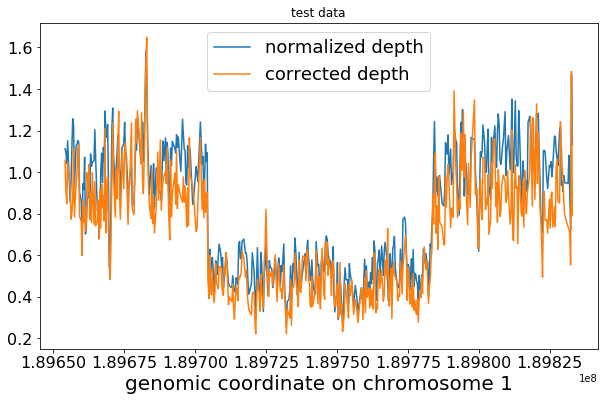

In [8]:
plot_corrected_depths(test_data, title='test data')